# Relatório Atividade 5

*Arthur Dimitri Brito Oliveira e Débora Nunes Pinto de Oliveira<br>
Prof. Antonio Marcus, Estimação e Identificação de Sistemas 21.2<br>
04 de Outubro de 2021*

Esse documento tem por objetivo descrever estimação da medição de um resistor pelo método dos mínimos quadrados. Para a análise da abordagem proposta, serão variados os parâmetros de coleta de dados, tais como número de amostras, quantidade de experimentos, e a qualidade do sinal coletado (a partir do ruído de medição).


---



## Questões Teóricas

- **Qual o impacto do ruído sobre as estimativas?** <br>
O ruído dificulta a estimação do processo ao passo que torna o resíduo da função de custo do algoritmo de mínimos quadrados mais significativo. Quanto maior esse resultado da norma escolhida, 
mais severo é o ajuste dos parâmetros de estimação. Logo, são necessárias mais amostras para garantir uma boa estimativa.

- **Quais são as características importantes das estimativas?** <br>
Um dos critérios importantes para avaliar a estimativa é se ela, mediante a realização de $N$ experimentos, não varia significativamente em relação ao valor central da sua distribuição de probabilidade nos últimos $k$ experimentos de $N$. Além disso, sua distribuição de probabilidade deve tender à distribuição normal, cuja media é igual ao valor verdadeiro (caso conhecido). 

- **Como selecionar a função de custo?** <br>
Para selecionar a função de custo deve-se levar em consideração a complexidade computacional, a verossimilhança do modelo com o sistema real a ser estimado, e a qualidade dos dados experimentais. Por padrão, inicia-se o procedimento de escolha com a análise da norma quadrática. <br> 
Considerando especificamente a variância, é apropriado escolher uma função de custo que minimize esta propriedade da estimativa. Conhecendo a FDP do erro entre o valor real e a estimativa, assintoticamente, é possível definir a função de custo ótima a partir da máxima verossimilhança como: $ \ell_{opt}(\varepsilon) = - \log f_e(\varepsilon)$ 

- **Como a escolha da função de custo afeta os resultados?** <br>
Caso a função de custo escolhida não acompanhe as propriedades do processo, os resultados de estimação serão insatisfatórios. Esse seria o caso de utilizar uma função de custo constante no tempo para um modelo variante no tempo. Outro exemplo seria quando a derivada da função de custo possui magnitude da mesma ordem do valor real a ser estimado, e, portanto a convergência dos parâmetros é lenta (no caso do algoritmo recursivo).

- **Quão complexo precisa ser o modelo? Qual é o impacto nas
estimativas?** <br>
O modelo deve atender a relação de compromisso entre viés e variância, sendo complexo a ponto de descrever os dados coletados, mas ainda generalista na realização de novas predições. Modelos mais complexos resultarão em dinâmicas próximas aos dados experimentais a custo de uma maior complexidade computacional. 




### Dependências

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


## Questão 1A

O objetivo deste exercício é estimar o valor da resistência $R_0$ a partir de uma série de medições de corrente e tensão. A relação entre essas grandezas é dada por:

$$ u_0(t)=R_0i_0(t), t=1,2,...,N$$

para $u_0(t)$ e $i_0(t)$ as medições exatas de corrente e tensão. 

Considere $100$ experimentos com $N=10,100,1000$ e $10000$ amostras. A corrente $i_0$ é uniformemente distribuída em $[-i_{max},i_{max}]$ para $i_{max} = 10$mA e $R_0=1000\Omega$. Essa corrente é medida sem erros, enquanto a medição da tensão é perturbada por um ruído aditivo $\eta_u(t)$ independente, de média nula e normalmente distribuído com variância $\sigma_u^2=1$. 

Logo, o conjunto de equações que representam as medições realizadas do sistema são:

$$i(t) = i_0(t)\\
u(t)=u_0(t)+\eta_u(t)$$

Para estimar o parâmetro não medido e desconhecido ($R_0$), empregou-se o método dos mínimos quadrados, cuja função de custo é:

$$V(R)=\frac{1}{N}\sum^N_{t=1}\big(u(t)-Ri(t)\big)^2$$ 

Sendo assim, a estimativa final $\hat{R}$ é dada por:

$$\hat{R}={\arg\min}_RV(R)$$

Derivando a equação da função de custo $V(r)$ e analiticamente encontrando $V^{'}(\hat{R})=0$ (uma vez que $\hat R$ é um mínimo da função de custo), deriva-se a expressão:

$$\hat{R}= \sum_{t=1}^Nu(t)i(t)/\sum^N_{t=1}i(t)^2$$

Abaixo, estão ilustradas as estimativas de 100 experimentos para $N=10,100,1000$ e $10000$ amostras. O valor real $R_0=1000\Omega$ está marcado em vermelho, enquanto os pontos em azul representam a estimativa $\hat R(N)$ para cada experimento. É importante destacar que a entrada foi mantida equivalente para cada experimento entre as diferentes quantidades de amostras.

In [ ]:
def myex01(N,i_0,R_0):
  n_u = np.random.normal(0, 1, N)
  u_0 = R_0*i_0
  u = u_0+n_u
  R = np.sum(np.multiply(u,i_0))/np.sum(np.multiply(i_0,i_0))
  return R

In [ ]:
samples_number = [10,100,1000,10000]
iterations_number = 100

#lists for building dictionary
r_estimations=[[],[],[],[]]
r_keys = ['R(10)','R(100)','R(1000)','R(10000)']
i_max = 0.01
R_0=1000
i_0 = np.random.uniform(-i_max,i_max,(iterations_number,np.array(samples_number).max()))

#outer loop for changing the number of samples
for sample_amount in samples_number:
  #inner loop to run a hundred simulations
  for sim in range(0,iterations_number,1): 
    #getting the values for specified N samples
    R = myex01(sample_amount,i_0[sim][0:sample_amount],R_0)
    #append in the position associated to the r_keys the value obtained by regression
    r_estimations[samples_number.index(sample_amount)].append(R)

# construct the dictionary for better organization
r_simulations = dict(zip(r_keys,r_estimations))

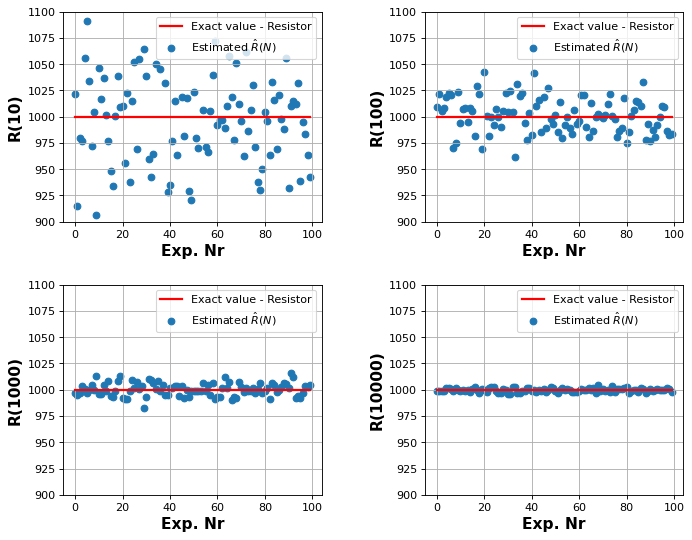

In [ ]:
figure(figsize=(10, 8), dpi=80)
for figure_idx in range(1,5,1):
  plt.subplot(2,2,figure_idx)
  #acessa a posição do dicionario de acordo com as keys do dicionario. ex: pos 0 -> r_keys[0] = 'R(10)'. Retorna todos os valores da simulação para R(10)
  plt.scatter(range(0,100,1),r_simulations[r_keys[figure_idx-1]],label=r'Estimated $\hat R(N)$')
  plt.ylim([900,1100])
  plt.plot(range(0,100,1),np.ones(100)*1000,color='red',linewidth=2,label=r'Exact value - Resistor')
  plt.legend()
  plt.subplots_adjust(hspace = 0.3)
  plt.subplots_adjust(wspace = 0.4)
  plt.ylabel(r_keys[figure_idx-1],fontsize=14,fontweight='bold')
  plt.xlabel('Exp. Nr',fontsize=14,fontweight='bold')
  plt.grid()

**Figura 1**: Valores estimados de resistência $\hat R(N)$ para $N=[10, 100, 1000, 10000]$ em um conjunto de 100 experimentos. 

A Figura 1 ressalta como a quantidade de amostras utilizadas, em um dado conjunto de experimentos, afeta a qualidade das estimativas obtidas por meio do método de mínimos quadrados. Observando a redução do espalhamento das amostras em torno do valor real, conclui-se que deve-se coletar o maior número de amostras possível.

## Questão 1B

Agora, considere a corrente constante $i_0(t)=0.01$A e a realização de 1000 experimentos para $N=10,100,1000$ e $10000$ amostras. O ruído de medição da tensão também será um ruído gaussiano de média nula e variância unitária. 

O gráfico abaixo ilustra, em vermelho, o desvio padrão do conjunto de 1000 estimativas para cada $N$ amostras. Em azul, estão representados os valores teóricos do desvio padrão, os quais são resultados de:

$$\sigma_R = \frac{1}{\sqrt N}\frac{\sigma_u}{i_0}$$

In [ ]:
def myex02(N):
  np.random.seed(0)
  R_0 = 1000
  i_0 = np.ones(N)*0.01
  R = []
  for i in range (0,1000):
    n_u = np.random.normal(0, 1, N)
    u_0 = R_0*i_0
    u = u_0+n_u
    R_i = np.sum(np.multiply(u,i_0))/np.sum(np.multiply(i_0,i_0))
    R.append(R_i)
    
  return np.array(R).std(),1/np.sqrt(N)*1/i_0[0]

(9, 11000)

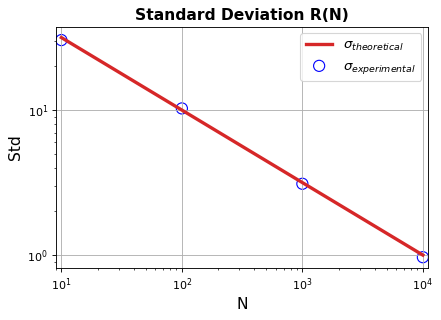

In [ ]:
std_N_experimental = []
std_N_theoretical = []

for sample in samples_number:
  std_exp, std_theor = myex02(sample)
  std_N_experimental.append(std_exp)
  std_N_theoretical.append(std_theor)

figure(figsize=(6, 4), dpi=80)
plt.title('Standard Deviation R(N)',fontsize = 14,fontweight='bold')
plt.ylabel('Std',fontsize=14)
plt.xlabel('N',fontsize=14)
plt.grid()
plt.loglog(samples_number,std_N_theoretical,'C3', lw=3,label=r'$\sigma_{theoretical}$')
plt.scatter(samples_number,std_N_experimental, s=100,facecolors='none',edgecolors='blue',label=r'$\sigma_{experimental}$')
plt.legend(fontsize = 12)
plt.xlim([9,11000])

**Figura 2**: Valores teóricos da variância (em vermelho) e os desvios-padrão (em azul).

O gráfico ilustrado na Figura 2 relaciona o número de amostras ao desvio padrão do conjunto de estimativas para mil experimentos. Observando o decaimento do desvio padrão à medida em que aumenta-se o número de amostras, é evidente que o incremento de $N$ resulta em uma melhoria na qualidade das estimativas, já que o desvio padrão é inversamente proporcional a $N$. Isto endossa a conclusão do experimento anterior. 

## Questão 2

Agora, será demonstrado que a distribuição da estimativas $\hat{R}$ para $N\rightarrow\infty$ é assintoticamente independente da distribuição do ruído aditivo na medição da tensão $n_u$.

Considere $i_0$, $R_0$ e $u_0$ conforme a questão anterior, mas para $N=2,4,8$ e $10^5$. Para o ruído $\eta_u(t)$, considere duas distribuições:


1.   $\eta_u$ um ruído gaussiano com distribuição $N(1,\sigma_u^2=0.2^2)$;
2.   $\eta_u$ um ruído uniformemente distribuído para $[-\sqrt 3 \sigma_u,\sqrt 3 \sigma_u]$.

A seguir, estão ilustradas as distribuições de probabilidade das estimativas para cada valor de $N$ adotando o distúrbio gaussiano (em azul) e uniformemente distribuído (em laranja).



In [ ]:
def myex03(N,R_0,sigma_u,i_max):
  i_0 = np.ones(N)*i_max
  R_n = []
  R_u = []

  for i in range (0,100000):
    # normal dist
    n_u = np.random.normal(0, sigma_u, N)
    # uniform noise
    u_u = np.random.uniform(-np.sqrt(3)*sigma_u,np.sqrt(3)*sigma_u,N)
    # generating output
    u_0 = R_0*i_0
    u_normal= u_0+n_u #normal
    u_unif = u_0+u_u #uniform 

    R_i_n = np.sum(np.multiply(u_normal,i_0))/np.sum(np.multiply(i_0,i_0))
    R_i_u = np.sum(np.multiply(u_unif,i_0))/np.sum(np.multiply(i_0,i_0))
    R_n.append(R_i_n) #100k experiments of R for normal noise 
    R_u.append(R_i_u) 
  return R_n,R_u


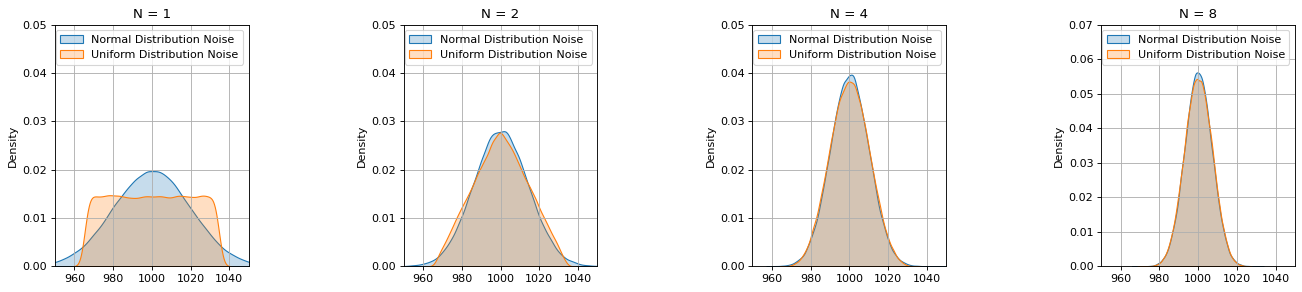

In [ ]:
from scipy.stats import norm
import seaborn as sns

# init variables
new_samples = [1,2,4,8]
sigma_u = 0.2
R_0 = 1000
i_max= 0.01

# init plot 
figure(figsize=(20, 4), dpi=80)

for sample in new_samples:
  R_normal, R_unif = myex03(sample,R_0,sigma_u,i_max) #100k estimations R
  plt.subplot(1,4,new_samples.index(sample)+1)
  sns.kdeplot(R_normal,shade='True',label='Normal Distribution Noise')
  sns.kdeplot(R_unif,shade='True',label='Uniform Distribution Noise')
  plt.legend()
  plt.title('N = ' + str(sample))
  plt.subplots_adjust(wspace = 0.8)
  plt.xlim([950,1050])
  if sample == 8:
    plt.ylim([0,0.07]) 
  else:
    plt.ylim([0,0.05]) 
  plt.grid()

**Figura 3**: Evolução da FDP de $\hat R$ como uma função de N. Em laranja, função densidade de probabilidade para o ruído uniforme. Em azul, a função densidade de probabilidade para o ruído gaussiano. 

Observa-se que, independentemente da natureza do ruído incorporado ao sinal de saída, aumentar o número de amostras resulta em distribuições com menor espalhamento em torno do valor real. Além disso, o algoritmo de mínimos quadrados consegue alcançar o valor real independentemente do tipo de ruído incorporado. 

## Questão 3

Nos exercícios anteriores, o ruído aditivo a medição da entrada era $\eta_i(t)=0$. Agora, será investigado se as mesmas consequências da pertubação de $\eta_u(t)$ na estimativa ocorrem para variações de $\eta_i(t)$. 

Considere $N=100$ amostras e $10^5$ repetições do experimento. Analogamente à questão 1, $i_0(t)$ é uniformemente distribuída em $[-10,10]$mA. O ruído de medição da entrada é gaussiano com média nula e variância $\sigma^2_i=0,0.5$ e $1$. Logo, o novo conjunto de equações que representam as medições realizadas do sistema são:

$$i(t) = i_0(t) + \eta_i(t)\\
u(t)=u_0(t)+\eta_u(t)$$

A seguir, estão ilustradas as distribuições de probabilidade para cada valor de $\sigma_i$ (em laranja) comparado à distribuição da estimativa para $\sigma_i^2=0$.



In [ ]:
std_i = [0,0.0005,0.001] 
N = 100
n_iterations = 100000
i_max = 0.01
i_0 = np.random.uniform(-i_max,i_max,(n_iterations,N))
R_list = [[],[],[]] 

for k in std_i:
  np.random.seed(0) 
  for sim in range(0,n_iterations):
    n_i = np.random.normal(0, k, N)
    i = i_0[sim] + n_i
    n_u = np.random.normal(0, 1, N)
    u_0 = R_0*i_0[sim]
    u = u_0+n_u
    R = np.sum(np.multiply(u,i))/np.sum(np.multiply(i,i))
    R_list[std_i.index(k)].append(R)

  print("Variance = "+str(k))
  print("R_Mean = " +str(np.array(R_list[std_i.index(k)]).mean().round(2))+"  |  R_Var = "+str(np.array(R_list[std_i.index(k)]).std()))
  print()  
  




Variance = 0
R_Mean = 999.94  |  R_Var = 17.35858831131028

Variance = 0.0005
R_Mean = 992.58  |  R_Var = 19.315248239725985

Variance = 0.001
R_Mean = 971.13  |  R_Var = 23.829851215482897



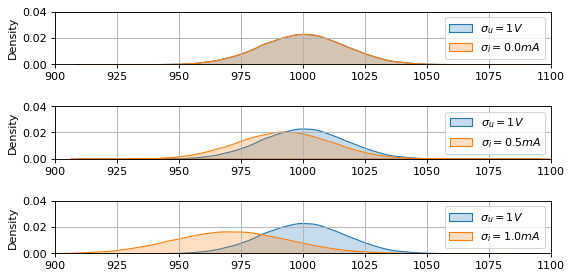

In [ ]:
figure(figsize=(8,4), dpi=80)
sigma_i=[0,0.5,1]
for i in range(0,3):
  plt.subplot(3,1,i+1)
  sns.kdeplot(R_list[0],shade='True',label=r'$\sigma_u=1V$')
  sns.kdeplot(R_list[i],shade='True',label=r'$\sigma_i=%.1fmA$' %sigma_i[i])
  plt.legend()
  plt.subplots_adjust(wspace = 0.8)
  plt.xlim([900,1100])
  plt.ylim([0,0.04])
  plt.subplots_adjust(hspace = 0.8)
  plt.grid()

**Figura 4**: Evolução da FDP de $\hat R$ como uma função do nível de ruído incorporado à corrente. Em azul, função densidade de probabilidade de $R$ no caso do ruído de variância $\sigma_u=1$. Em laranja, as FDPs de $R$ para $\sigma_i = [0, 0.5mA, 1mA]$ 

Observando as distribuições de probabilidade ilustradas na Figura 4, constata-se que o efeito do ruído aplicado ao sinal de entrada $\eta_i(t)$ difere daquele resultante do distúrbio incorporado à saída $\eta_u(t)$. Enquanto o ruído $\eta_u(t)$ influencia, somente, a variância da estimativa (espalhamento ao redor da média), o distúrbio $\eta_i(t)$ também caracteriza uma polarização da estimativa (deslocamento da média $\mu$). Quanto maior é a variância do sinal $\eta_i(t)$, maior é o deslocamento do valor médio estimado em relação ao valor real $R_0=1000\Omega$. 